<h1>Лабораторная работа номер 4. Решение СЛАУ</h1>

<strong>1. </strong>Создадим функцию, реализующую решение СЛАУ методом LU-разложения

In [8]:
def LU(A, B):
    n = len(A)
    L = [[0] * n for _ in range(n)]
    U = [[0] * n for _ in range(n)]
    for i in range(n):
        U[i][i] = 1

    L[0][0] = A[0][0]
    for m in range(0, n):
        j = m
        for i in range(j, n):
            L[i][j] = A[i][j]
            for k in range(0, j):
                L[i][j] -= L[i][k] * U[k][j]

        i = m
        for j in range(1, n):
            U[i][j] = A[i][j]
            for k in range(0, i):
                U[i][j] -= L[i][k] * U[k][j]
            U[i][j] /= L[i][i]

    x = [0] * n
    y = [0] * n
    for s in range(0, n):
        y[s] = B[s]
        for k in range(s):
            y[s] -= L[s][k] * y[k]
        y[s] /= L[s][s]

    for s in reversed(range(0, n)):
        x[s] = y[s]
        for k in range(0, n - s - 1):
            x[s] -= U[s][s + k + 1] * x[s + k + 1]
        x[s] /= U[s][s]

    return x

In [9]:
import numpy as np

A = [[8, -1, -1, 2], [1, 6, -2, -2], [2, 1, -5, 1], [1, -1, 1, -4]]
B = [11, -7, 2, -2]
print(np.linalg.solve(A, B))
print(LU(A, B))

[ 1.0000000e+00 -1.0000000e+00  5.0841989e-17  1.0000000e+00]
[1.0, -1.0, 0.0, 1.0]


<strong>2.</strong>Теперь напишем функции, реализующие методы решения Якоби и Гаусса-Зейделя. Помимо матрицы A и вектора B он будет принимать необходимую точность решения. А также, кроме самого решения среди возвращаемых значений будут количество сделанных шагов и время выполнения

In [10]:
import time
import math

def jacobi(A, B, e):
    N = 1
    begin_time = time.perf_counter_ns()
    n = len(A)
    x = [1] * n
    x_next = [B[i] for i in range(n)]
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            x_next[i] -= A[i][j] * x[j]
        x_next[i] /= A[i][i]
    while math.sqrt(sum([(x_next[i] - x[i]) ** 2 for i in range(len(x))])) > e:
        N += 1
        x = x_next.copy()
        x_next = [B[i] for i in range(n)]
        for i in range(n):
            for j in range(n):
                if i == j: continue
                x_next[i] -= A[i][j] * x[j]
            x_next[i] /= A[i][i]
    work_time = time.perf_counter_ns() - begin_time
    return x, N, work_time / 1e6


def gauss_zeudel(A, B, e):
    N = 1
    begin_time = time.perf_counter_ns()
    n = len(A)
    x = [1] * n
    x_next = [B[i] for i in range(n)]
    for i in range(n):
        for j in range(i):
            x_next[i] -= A[i][j] * x_next[j]
        for j in range(i + 1, n):
            x_next[i] -= A[i][j] * x[j]
        x_next[i] /= A[i][i]
    while math.sqrt(sum([(x_next[i] - x[i]) ** 2 for i in range(len(x))])) > e:
        N += 1
        x = x_next.copy()
        x_next = [B[i] for i in range(n)]
        for i in range(n):
            for j in range(i):
                x_next[i] -= A[i][j] * x_next[j]
            for j in range(i + 1, n):
                x_next[i] -= A[i][j] * x[j]
            x_next[i] /= A[i][i]
    work_time = time.perf_counter_ns() - begin_time
    return x, N, work_time / 1e6

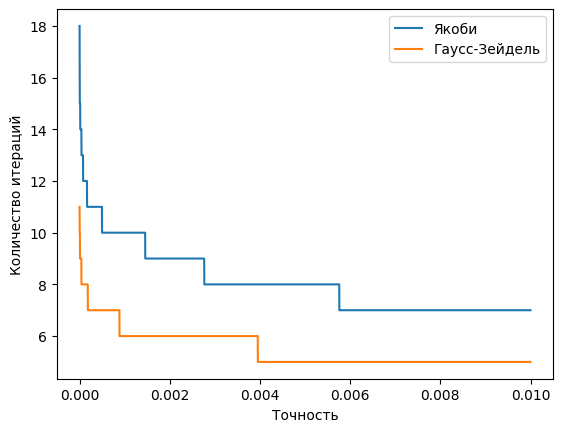

In [11]:
import matplotlib.pyplot as plt

A = [[8, -1, -1, 2], [1, 6, -2, -2], [2, 1, -5, 1], [1.25, -1.25, 1.25, -5]]
B = [11, -7, 2, -2.5]
e_vals = [i * 1e-6 for i in range(1, 10000)]
jc = [jacobi(A, B, e) for e in e_vals]
gz = [gauss_zeudel(A, B, e) for e in e_vals]
plt.plot(e_vals, [sol[1] for sol in jc], label='Якоби')
plt.plot(e_vals, [sol[1] for sol in gz], label = 'Гаусс-Зейдель')
plt.xlabel("Точность")
plt.ylabel("Количество итераций")
plt.legend()
plt.show()

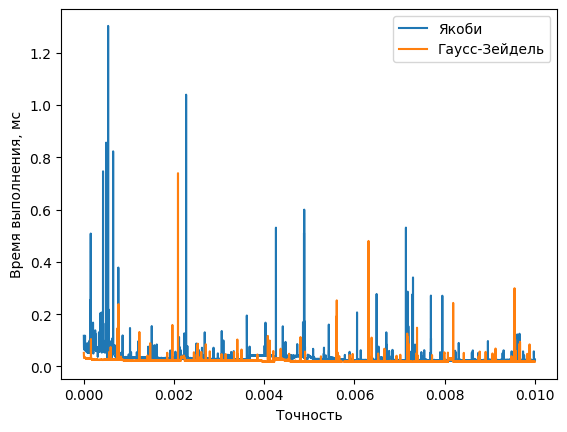

In [23]:
jc = [jacobi(A, B, e) for e in e_vals]
gz = [gauss_zeudel(A, B, e) for e in e_vals]
plt.plot(e_vals, [sol[2] for sol in jc], label='Якоби')
plt.plot(e_vals, [sol[2] for sol in gz], label = 'Гаусс-Зейдель')
plt.xlabel("Точность")
plt.ylabel("Время выполнения, мс")
plt.legend()
plt.show()

<strong>3.</strong> Реализуем решение метода Гаусса - зейделя в матричном виде

In [13]:
# def gz_matrix(A, B, e):
#     N = 1
#     A = np.array(A)
#     B = np.array(B)
#     begin_time = time.perf_counter_ns()
#     n = len(A)
#     x = np.array([1] * n)
#     m1 = np.linalg.inv(np.diag(np.diag(A)) + np.tril(A, -1))
#     x_next = np.dot(m1, B) - np.dot(np.dot(m1, np.triu(A, 1)), x)
#     while math.sqrt(sum([(x_next[i] - x[i]) ** 2 for i in range(len(x))])) > e:
#         N += 1
#         x = x_next.copy()
#         #m1 = np.linalg.inv(np.diag(np.diag(A)) + np.tril(A, -1))
#         x_next = np.dot(m1, B) - np.dot(np.dot(m1, np.triu(A, 1)), x)
#     work_time = time.perf_counter_ns() - begin_time
#     return x, N, work_time / 1e6

def gz_matrix(A, B, e):
    N = 1
    
    A = np.array(A)
    B = np.array(B)
    U = np.triu(A,1)
    L = np.tril(A, -1)
    D = np.diag(np.diag(A))
    
    begin_time = time.perf_counter_ns()
    n = len(A)
    x = np.array([1] * n)
    
    m1 = np.linalg.inv(D + L)
    m2 = np.dot(m1, B)
    m3 = np.dot(m1, U)
    x_next = m2 - np.dot(m3, x)
    
    while math.sqrt(sum([(x_next[i] - x[i]) ** 2 for i in range(len(x))])) > e:
        N += 1
        x = x_next.copy()
        x_next = m2 - np.dot(m3, x)
    work_time = time.perf_counter_ns() - begin_time
    return x, N, work_time / 1e6

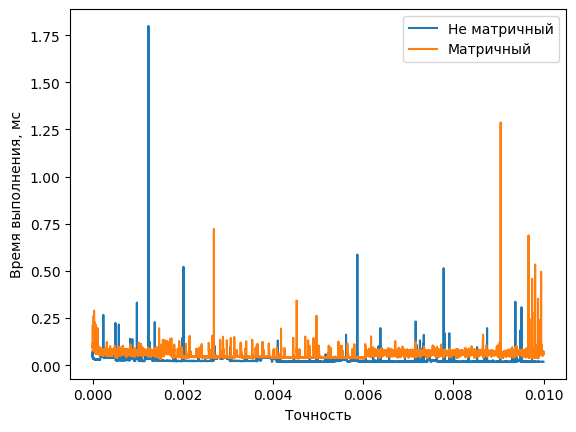

In [16]:
gz = [gauss_zeudel(A, B, e) for e in e_vals]
gzm = [gz_matrix(A, B, e) for e in e_vals]
plt.plot(e_vals, [sol[2] for sol in gz], label='Не матричный')
plt.plot(e_vals, [sol[2] for sol in gzm], label='Матричный')
plt.xlabel("Точность")
plt.ylabel("Время выполнения, мс")
plt.legend()
plt.show()